In [31]:
#importando as bibliotecas que vamos usar
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np


In [32]:
senadores = pd.read_csv("2018.csv", ",")#lendo o arquivo csv

In [33]:
senadores.head() #abrindo as 5 primeiras do dataset

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2018.0,1.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000
1,2018.0,1.0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99"
2,2018.0,1.0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29"
3,2018.0,1.0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...","1553,99"
4,2018.0,2.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,01/02/2018,Despesa com pagamento de aluguel de imóvel par...,6000


In [34]:
senadores.dtypes #verificando que tipos de dados contém no dataset

ANO                  float64
MES                  float64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO     object
dtype: object

In [35]:
senadores.isnull().sum() #verificando valores inválidos no dataset

ANO                     1
MES                     1
SENADOR                 1
TIPO_DESPESA            1
CNPJ_CPF                1
FORNECEDOR              1
DOCUMENTO            1017
DATA                    1
DETALHAMENTO         5611
VALOR_REEMBOLSADO       1
dtype: int64

In [36]:
#verificando a porcentagem de erros  dos valores inválidos no dataset
(senadores.isnull().sum() / senadores.shape[0]).sort_values(ascending=False)

DETALHAMENTO         0.229086
DOCUMENTO            0.041522
VALOR_REEMBOLSADO    0.000041
DATA                 0.000041
FORNECEDOR           0.000041
CNPJ_CPF             0.000041
TIPO_DESPESA         0.000041
SENADOR              0.000041
MES                  0.000041
ANO                  0.000041
dtype: float64

In [37]:
senadores.dropna(inplace=True)#removendo os valores inválidos

In [38]:
senadores.isnull().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DOCUMENTO            0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
dtype: int64

In [39]:
#transformando a coluna "VALOR_REEMBOLSADO" de string para float
senadores['VALOR_REEMBOLSADO'] = senadores['VALOR_REEMBOLSADO'].str.replace(",", ".").astype('float')

In [44]:
senadores.dtypes

ANO                  float64
MES                  float64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO    float64
dtype: object

In [55]:
gastos_senadores = {} #dicionário onde vai armazenar cada político e seu gasto

In [56]:
#varíável onde estabelece cada senador e seus gastos únicos
politicos_senadores = senadores["SENADOR"].unique()

In [57]:
politicos_senadores[0:10] #alguns políticos contidos no arquivo

array(['ACIR GURGACZ', 'AÉCIO NEVES', 'AIRTON SANDOVAL', 'ALVARO DIAS',
       'ANA AMÉLIA', 'ÂNGELA PORTELA', 'ANTONIO ANASTASIA',
       'ANTÔNIO CARLOS VALADARES', 'ARMANDO MONTEIRO', 'ATAÍDES OLIVEIRA'],
      dtype=object)

In [60]:
#Vamos criar uma função onde vai ser criado um novo dataframe apenas com os devidos gastos de cada senador
for y in politicos_senadores:
    y_nomes = senadores[senadores["SENADOR"] == y]
    total_gastos = y_nomes["VALOR_REEMBOLSADO"].sum()
    gastos_senadores[y] = total_gastos
    senador_gasto = pd.DataFrame.from_dict(gastos_senadores, orient = 'index')
    senador_gasto.columns = ["VALOR_REEMBOLSADO"]

In [61]:
senador_gasto.head() #Visualizando o novo data dataframe criado

,VALOR_REEMBOLSADO
ACIR GURGACZ,311797.29
AÉCIO NEVES,247722.97
AIRTON SANDOVAL,182856.83
ALVARO DIAS,39660.38
ANA AMÉLIA,147226.50


In [62]:
#Criando a variável do senador em questão para verificar os seus gastos
ana_ameliaRS = senadores[senadores["SENADOR"] == "ANA AMÉLIA"].reset_index() 

In [63]:
ana_ameliaRS.shape 

(495, 11)

In [64]:
ana_ameliaRS.head() #Visualizando as 5 primeiras linhas 

,index,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,703,2018.0,1.0,ANA AMÉLIA,"Aluguel de imóveis para escritório político, c...",40.432.544/0101-00,Claro S.A,112533,17/01/2018,Despesa com telefone fixo do Escritório Políti...,117.28
1,704,2018.0,1.0,ANA AMÉLIA,"Aluguel de imóveis para escritório político, c...",08.467.115/0001-00,Companhia Estadual de Distribuição de Energia ...,63767096,29/01/2018,Despesa com energia elétrica do Escritório Pol...,238.94
2,705,2018.0,1.0,ANA AMÉLIA,"Aluguel de imóveis para escritório político, c...",92.811.959/0001-25,Fundação Banrisul de Seguridade Social,5208447477,23/01/2018,Despesa com taxa de condomínio do Escritório P...,810.50
3,706,2018.0,1.0,ANA AMÉLIA,"Aluguel de imóveis para escritório político, c...",92.811.959/0001-25,Fundação Banrisul de Seguridade Social,5208447477/1,23/01/2018,Despesa com aluguel do Escritório Político no RS.,1101.12
4,707,2018.0,1.0,ANA AMÉLIA,"Aluguel de imóveis para escritório político, c...",92.811.959/0001-25,Fundação Banrisul de Seguridade Social,63767096/3,23/01/2018,Despesa com pagamento de IPTU do Escritório Po...,1351.07


In [66]:
#Vamos criar a função onde vai definir em que tipo de gastos o senador foi reembolsado
def cat_gastos(senador):
    nome_senador = senadores[senadores['SENADOR'] == senador]
    nome_senador = nome_senador.groupby('TIPO_DESPESA')[['SENADOR', 'VALOR_REEMBOLSADO']].sum()
    return nome_senador

ana = cat_gastos('ANA AMÉLIA')
ana.sort_values(by='VALOR_REEMBOLSADO', ascending = False)

,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Passagens aéreas, aquáticas e terrestres nacionais",59582.68
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",37289.28
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",27970.60
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",16700.00
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",5683.94


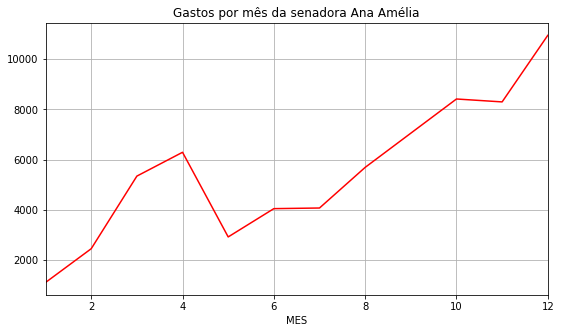

In [77]:
despesa_ana = ana_ameliaRS[ana_ameliaRS['TIPO_DESPESA'] == 'Passagens aéreas, aquáticas e terrestres nacionais']
plot_despesa = despesa.groupby('MES')['VALOR_REEMBOLSADO'].sum()
plot_despesa.plot(title = 'Gastos por mês da senadora Ana Amélia', color = 'red', figsize=(9,5), grid=True)

In [72]:
#Criando a variável do senador em questão para verificar os seus gastos
paulo_paimRS = senadores[senadores["SENADOR"]== "PAULO PAIM"].reset_index()

In [73]:
paulo_paimRS.shape

(547, 11)

In [75]:
paulo_paimRS.head() #Visualizando as 5 primeiras linhas 

,index,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,16073,2018.0,1.0,PAULO PAIM,"Aluguel de imóveis para escritório político, c...",92.802.784/0001-90,Companhia Riograndense de Saneamento - Corsan,"1,00002923962018E+016",05/01/2018,Despesa com água - escritório político.,126.19
1,16074,2018.0,1.0,PAULO PAIM,"Aluguel de imóveis para escritório político, c...",10.667.527/0001-28,Inviolável Canoas Alarmes Ltda,24524,31/01/2018,Despesa com serviço de vigilância patrimonial ...,869.52
2,16075,2018.0,1.0,PAULO PAIM,"Aluguel de imóveis para escritório político, c...",10.667.527/0001-28,Inviolável Canoas Alarmes Ltda,24525,31/01/2018,Despesa com vigilância patrimonial - Escritóri...,1165.47
3,16076,2018.0,1.0,PAULO PAIM,"Aluguel de imóveis para escritório político, c...",00.108.786/0258-26,NET Serviços de Comunicação S/A,603001023124,25/02/2018,Despesa com Assinatura de TV a cabo - Escritór...,633.67
4,16077,2018.0,1.0,PAULO PAIM,"Aluguel de imóveis para escritório político, c...",02.016.440/0001-62,RGE Sul Distribuidora de Energia S.A,5495228,04/01/2018,Despesa com energia elétrica - Escritório Polí...,99.52


In [76]:
#Vamos criar a função onde vai definir em que tipo de gastos o senador foi reembolsado
paulo = cat_gastos('PAULO PAIM')
paulo.sort_values(by='VALOR_REEMBOLSADO', ascending = False)

,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",123146.54
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",80216.91
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",71484.22
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",63507.65
Divulgação da atividade parlamentar,44895.00
"Passagens aéreas, aquáticas e terrestres nacionais",32536.79


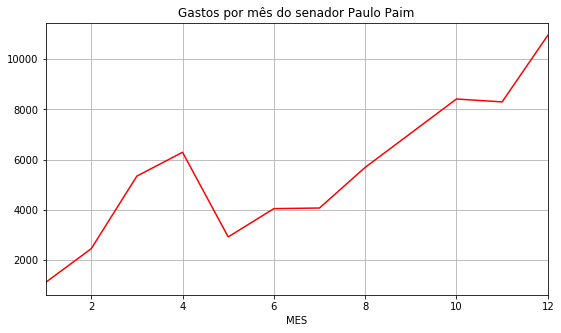

In [78]:
despesa_paulo = paulo_paimRS[paulo_paimRS["TIPO_DESPESA"] == "Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar"]
plot_despesa = despesa.groupby('MES')['VALOR_REEMBOLSADO'].sum()
plot_despesa.plot(title = 'Gastos por mês do senador Paulo Paim', color = 'red', figsize=(9,5), grid=True)